# Machine Learning Workshop


## Machine Learning
Tom Mitchell (1998) Well-posed Learning
Problem: A computer program is said to learn
from experience E with respect to some task T
and some performance measure P, if its
performance on T, as measured by P, improves
with experience E.

### Supervised Learning
Machine learns from exprience E that has the true answers (label) for each sample.

**Supervised Learning:**
* Regression
* Classification

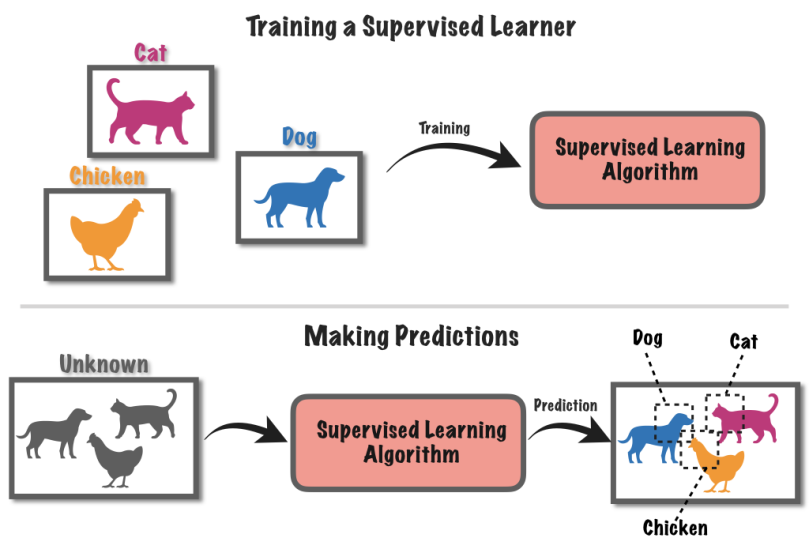


#### Regression
The goal is to predict a real number. 

**Examples:**
* Predict house price based
* Predict market demand for a product
* Predict hydro price in near future
* Predict status of a sensor in an ICS

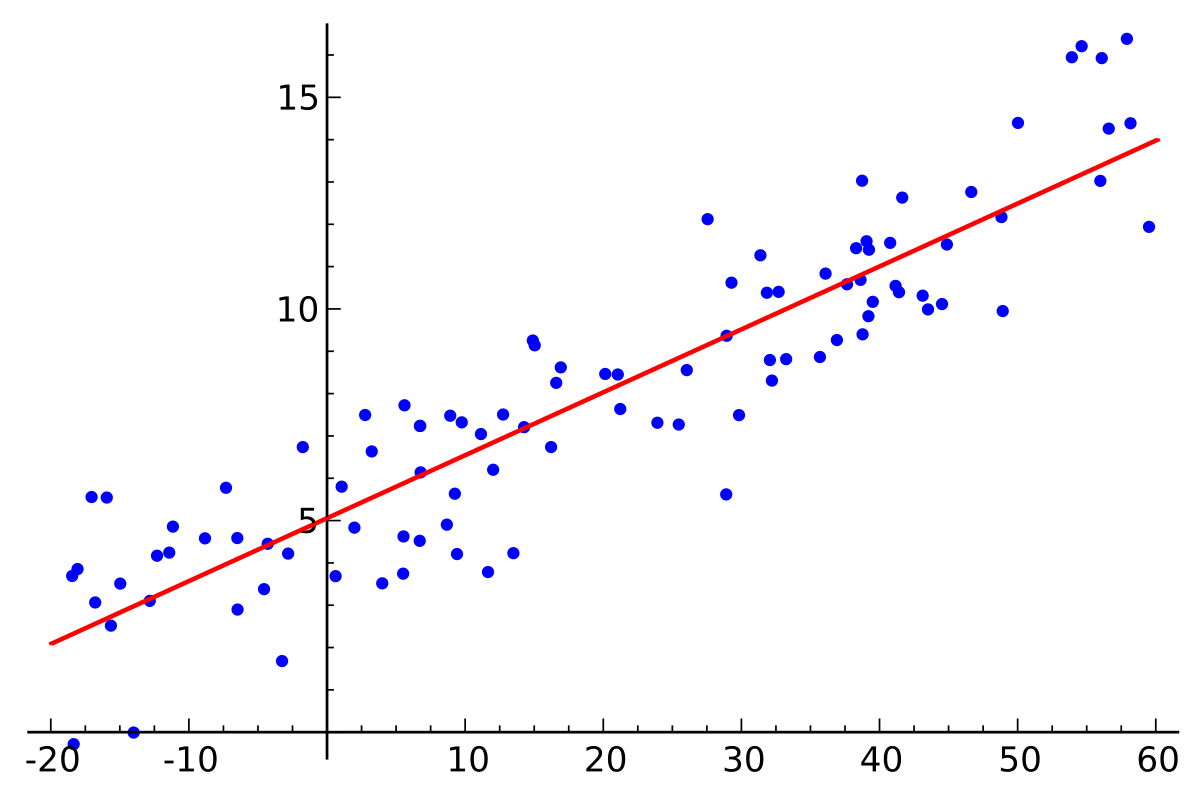

#### Classification
The goal is to classify a sample into one of pre-defined classes.

**Examples:**
* Classify vehicles into car, truck, and van
* Classify comments as good or bad
* Classify speaker gender
* Classify text language
* Classify a network packet as a normal or attack 
* Classify ICS status as normal or abnormal

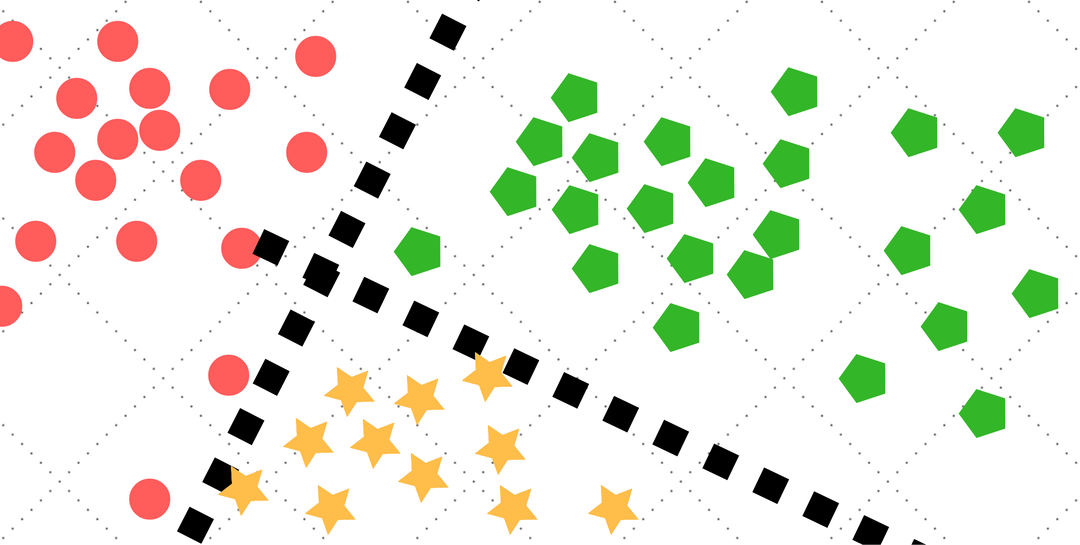


### Unsupervised Learning
Machine tries to learn from the experience without knowing the true answer. 

**Examples:**


*   Categorizing users in social media
*   Recommendation engins
*   Image segmentation


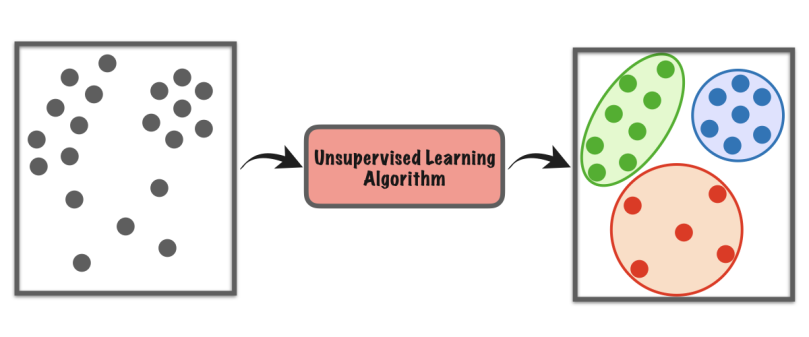

## Datasets

### Import data
 Pandas library is used to import data into python.

#### CSV file

In [1]:
# Import the library
import pandas as pd

In [2]:
# Load a CSV file
csv_data = pd.read_csv('data/income.csv')
csv_data.shape

(22, 3)

In [3]:
csv_data.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [4]:
csv_data.tail()

,Name,Age,Income($)
17,Priyanka,41,63000
18,Nick,43,64000
19,Alia,39,80000
20,Sid,41,82000
21,Abdul,39,58000


#### Excel file

In [7]:
# Read from excel file

excel_data = pd.read_excel('data/stocks_weather.xlsx', sheet_name = 0)
excel_data.shape

(3, 5)

In [8]:
excel_data

,Unnamed: 0,eps,pe,price,tickers
0,0,27.82,30.37,845,GOOGL
1,1,4.61,14.26,65,WMT
2,2,2.12,30.97,64,MSFT


In [9]:
excel_data.iloc[:,1:]

,eps,pe,price,tickers
0,27.82,30.37,845,GOOGL
1,4.61,14.26,65,WMT
2,2.12,30.97,64,MSFT


#### MAT file

In [11]:
from scipy.io import loadmat

In [12]:
# Load the .mat data
data = loadmat('data/cars_train_annos.mat')

In [13]:
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sat Dec 14 14:13:07 2013',
 '__version__': '1.0',
 '__globals__': [],
 'annotations': array([[(array([[39]], dtype=uint8), array([[116]], dtype=uint8), array([[569]], dtype=uint16), array([[375]], dtype=uint16), array([[14]], dtype=uint8), array(['00001.jpg'], dtype='<U9')),
         (array([[36]], dtype=uint8), array([[116]], dtype=uint8), array([[868]], dtype=uint16), array([[587]], dtype=uint16), array([[3]], dtype=uint8), array(['00002.jpg'], dtype='<U9')),
         (array([[85]], dtype=uint8), array([[109]], dtype=uint8), array([[601]], dtype=uint16), array([[381]], dtype=uint16), array([[91]], dtype=uint8), array(['00003.jpg'], dtype='<U9')),
         ...,
         (array([[26]], dtype=uint8), array([[246]], dtype=uint8), array([[660]], dtype=uint16), array([[449]], dtype=uint16), array([[163]], dtype=uint8), array(['08142.jpg'], dtype='<U9')),
         (array([[78]], dtype=uint8), array([[526]], dtype=uint16), 

In [14]:
X = data['annotations']
X.shape

(1, 8144)

In [15]:
X = data['annotations']
X = X.transpose()
X.shape

(8144, 1)

In [16]:
X[0][0]

(array([[39]], dtype=uint8), array([[116]], dtype=uint8), array([[569]], dtype=uint16), array([[375]], dtype=uint16), array([[14]], dtype=uint8), array(['00001.jpg'], dtype='<U9'))

In [17]:
[item.flat[0] for item in X[0][0]]

[39, 116, 569, 375, 14, '00001.jpg']

#### Split the data
To avoid overfitting (memorizing the samples), some part of data (test data) should be hidden from the model during the training.

In [18]:
# Import the required libraies
import pandas as pd
from sklearn.model_selection import train_test_split

In [19]:
data = pd.read_csv("data/carprices.csv")
data.head()

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500


In [20]:
# Seperate features and labels
X = data[['Mileage', 'Age(yrs)']]
y = data['Sell Price($)']

In [21]:
print(X.shape)
print(y.shape)

(20, 2)
(20,)


In [22]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) 

In [23]:
print(X_train.shape)
print(X_test.shape)

(14, 2)
(6, 2)


What should we do if we have too many features?

In [24]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [25]:
import numpy as np
data = np.array(data)

In [26]:
data.shape

(20, 3)

In [27]:
X = data[:, :-1]
y = data[:, -1]

In [28]:
print(X.shape)
print(y.shape)

(20, 2)
(20,)


In [29]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) 

In [30]:
print(X_train.shape)
print(X_test.shape)

(14, 2)
(6, 2)


### Data pre-processing

#### Data normalization

Maps all the values to [0,1]. The min value is mapped to 0 and the max value is mapped to 1.

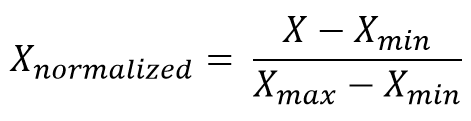


In [31]:
# Import the normalization library
from sklearn.preprocessing import MinMaxScaler

In [32]:
# Define the data
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]

In [33]:
# Define the scaler
scaler = MinMaxScaler()
# Fit the scaler on the data
print(scaler.fit(data))

MinMaxScaler()


In [34]:
print(scaler.data_max_)

[ 1. 18.]


In [35]:
print(scaler.transform(data))

[[0.   0.  ]
 [0.25 0.25]
 [0.5  0.5 ]
 [1.   1.  ]]


In [36]:
# Apply the trained scaler on the test data
print(scaler.transform([[-.25, 2]]))

[[0.375 0.   ]]


In [37]:
scaler.fit_transform(data)

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

#### Data standardization

Apply a normal distribution with the mean of 0 and std of 1 over the data.


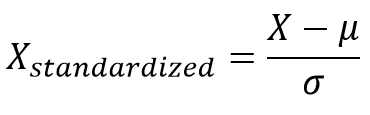

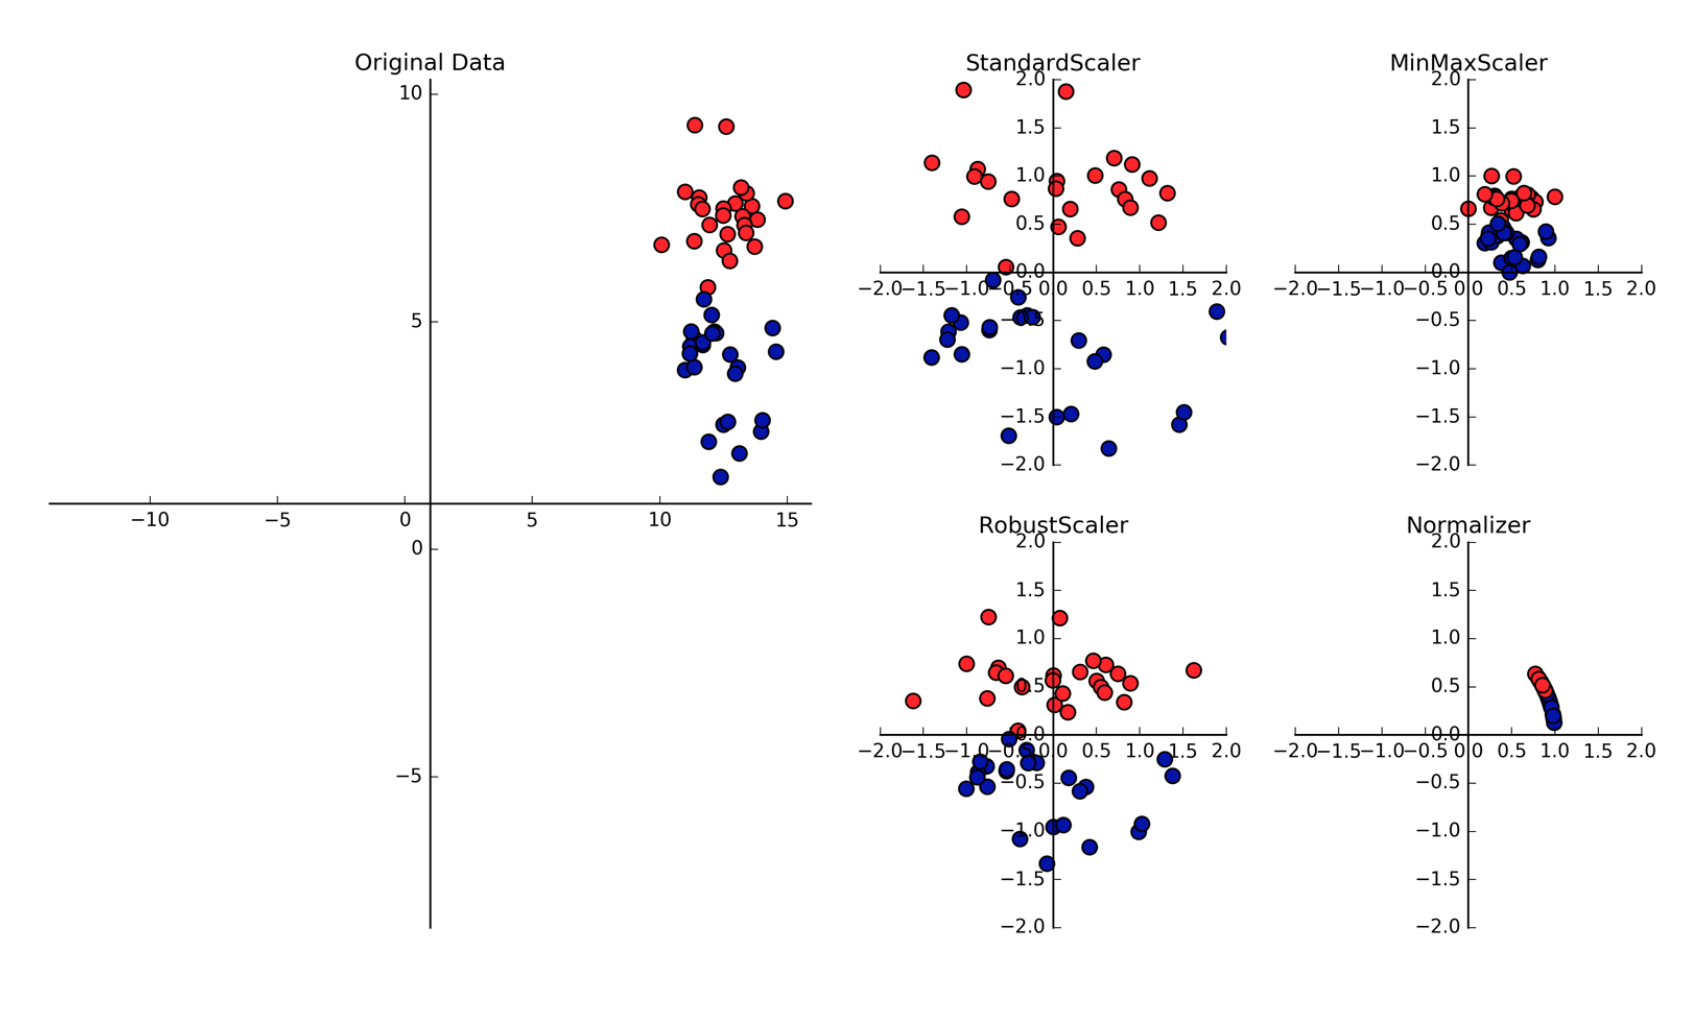

In [38]:
# Import the normalization library
from sklearn.preprocessing import StandardScaler

In [39]:
# Define the data
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]

In [40]:
# Define the scaler
scaler = StandardScaler()
# Fit the scaler on the data
print(scaler.fit(data))

StandardScaler()


In [41]:
print(scaler.mean_)

[-0.125  9.   ]


In [42]:
print(scaler.transform(data))

[[-1.18321596 -1.18321596]
 [-0.50709255 -0.50709255]
 [ 0.16903085  0.16903085]
 [ 1.52127766  1.52127766]]


In [43]:
# Apply the trained scaler on the test data
print(scaler.transform([[-.25, 2]]))

[[-0.16903085 -1.18321596]]


#### Detect and remove the outliers


In [45]:
# Import the data
df = pd.read_csv("data/heights.csv")
df

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9
5,khusbu,5.4
6,dmitry,6.2
7,selena,6.5
8,john,7.1
9,imran,14.5


In [46]:
# Define the max threshold
max_thresold = df['height'].quantile(0.95)
max_thresold

9.689999999999998

In [47]:
# Anomaly sample(s) based on the max threshold
df[df['height']>max_thresold]

,name,height
9,imran,14.5


In [48]:
# Define the min threshold
min_thresold = df['height'].quantile(0.05)
min_thresold

3.6050000000000004

In [49]:
# Anomaly sample(s) based on the min threshold
df[df['height']<min_thresold]

,name,height
12,yoseph,1.2


In [50]:
# Remove outliers
df_wo_outliers = df[(df['height']<max_thresold) & (df['height']>min_thresold)]
df_wo_outliers

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9
5,khusbu,5.4
6,dmitry,6.2
7,selena,6.5
8,john,7.1
10,jose,6.1


#### Handling missing values

In [51]:
import numpy as np
import pandas as pd

In [52]:
# Identifying missing values in numpy arrays
X = np.array([[1,2],
              [np.NaN,1],
              [3,np.NaN],
              [2,4],
              [1,7]])
X

array([[ 1.,  2.],
       [nan,  1.],
       [ 3., nan],
       [ 2.,  4.],
       [ 1.,  7.]])

In [53]:
# Check NaN values in numpy array
np.isnan(X)

array([[False, False],
       [ True, False],
       [False,  True],
       [False, False],
       [False, False]])

In [55]:
if True in np.isnan(X):
    print("y")

y


In [56]:
# Converting the numpy array to Pandas Dataframe
X2 = pd.DataFrame(X)

In [57]:
X2

,0,1
0,1.0,2.0
1,NaN,1.0
2,3.0,NaN
3,2.0,4.0
4,1.0,7.0


In [58]:
# Checking for missing values
X2.isnull()

,0,1
0,False,False
1,True,False
2,False,True
3,False,False
4,False,False


In [59]:
if True in X2.isnull():
    print("y")


In [60]:
X2

,0,1
0,1.0,2.0
1,NaN,1.0
2,3.0,NaN
3,2.0,4.0
4,1.0,7.0


In [61]:
# Drop missing value rows
X2.dropna()

,0,1
0,1.0,2.0
3,2.0,4.0
4,1.0,7.0


In [62]:
# Impute missing values with constant value
X2.fillna(-1)

,0,1
0,1.0,2.0
1,-1.0,1.0
2,3.0,-1.0
3,2.0,4.0
4,1.0,7.0


In [63]:
# Impute missing values with mean, max, min, median of the column
X2.fillna(X2.mean())

,0,1
0,1.00,2.0
1,1.75,1.0
2,3.00,3.5
3,2.00,4.0
4,1.00,7.0


In [64]:
# Impute missing values using sklearn library
from sklearn.impute import SimpleImputer


In [65]:
X2

,0,1
0,1.0,2.0
1,NaN,1.0
2,3.0,NaN
3,2.0,4.0
4,1.0,7.0


In [66]:
# strategy = 'mean', 'median', 'most_frequent', 'constant'
imputer = SimpleImputer(missing_values = np.NaN, strategy= 'mean')
X3 = imputer.fit_transform(X2)
pd.DataFrame(X3)

,0,1
0,1.00,2.0
1,1.75,1.0
2,3.00,3.5
3,2.00,4.0
4,1.00,7.0


## Examples

### Linear Regression

Predicting the home price based on its size

In [67]:
# Import the libraries
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt


In [68]:
# import the data
data = pd.read_csv("data/homeprices.csv")
data

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


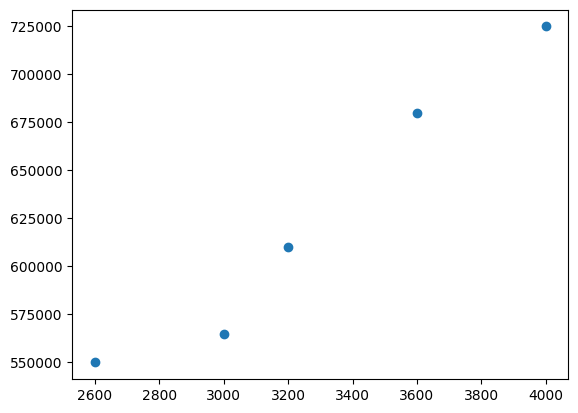

In [69]:
# Plot the data
plt.scatter(data.area, data.price)

In [70]:
# Seperate the features and label
X = data.drop('price', axis = 'columns')
y = data.price

In [71]:
y

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [72]:
# Define and fit a model on the data
lr = linear_model.LinearRegression()
lr.fit(X, y)

LinearRegression()

y = WX + b

In [73]:
w = lr.coef_
b = lr.intercept_

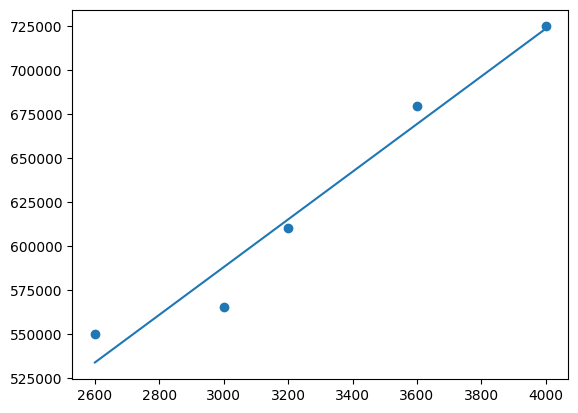

In [74]:
x = np.array(X)
plt.scatter(data.area, data.price)
plt.plot(x, w*x+b)

In [75]:
lr.predict([[5748]])

C:\Users\maghs\.conda\envs\transformersJupyter\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([961123.97260274])

### Clustering

Categorize employees based on salary and age.

In [76]:
# import the libraries
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [78]:
#import the data
data = pd.read_csv("data/income.csv")
data.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


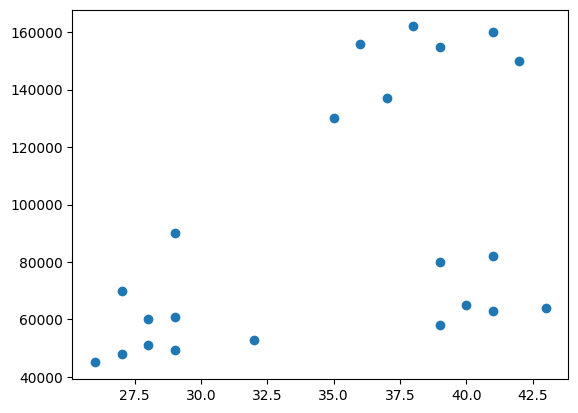

In [79]:
#plot the data
plt.scatter(data.Age, data['Income($)'])

In [80]:
km = KMeans(n_clusters= 3)
y_pred = km.fit_predict(data[['Age', 'Income($)']])
y_pred

C:\Users\maghs\.conda\envs\transformersJupyter\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\maghs\.conda\envs\transformersJupyter\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [81]:
data['cluster'] = y_pred
data.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


In [82]:
# Clusters centers
km.cluster_centers_

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

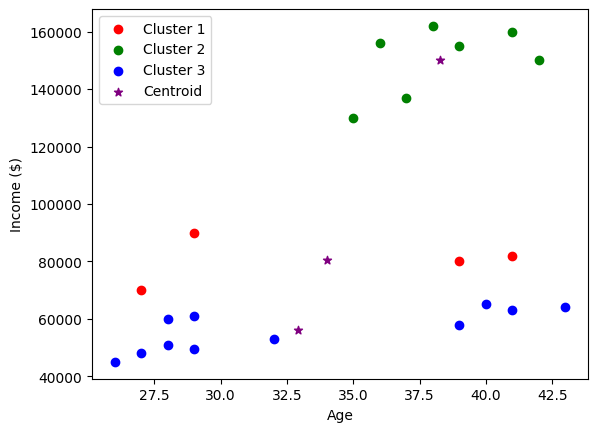

In [83]:
df1 = data[data.cluster == 0]
df2 = data[data.cluster == 1]
df3 = data[data.cluster == 2]

plt.scatter(df1.Age, df1['Income($)'], color = 'red', label = "Cluster 1")
plt.scatter(df2.Age, df2['Income($)'], color = 'green', label = "Cluster 2")
plt.scatter(df3.Age, df3['Income($)'], color = 'blue',  label = "Cluster 3")

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='Centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [84]:
data.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


In [85]:
# Do the normalization
from sklearn.preprocessing import MinMaxScaler

In [86]:
age_scaler = MinMaxScaler()
income_scaler = MinMaxScaler()

data['Age'] = age_scaler.fit_transform(data[['Age']])
data['Income($)'] = income_scaler.fit_transform(data[['Income($)']])

In [87]:
data.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [88]:
km = KMeans(n_clusters= 3)
y_pred = km.fit_predict(data[['Age', 'Income($)']])
y_pred

C:\Users\maghs\.conda\envs\transformersJupyter\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\maghs\.conda\envs\transformersJupyter\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [89]:
data['cluster'] = y_pred
data.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


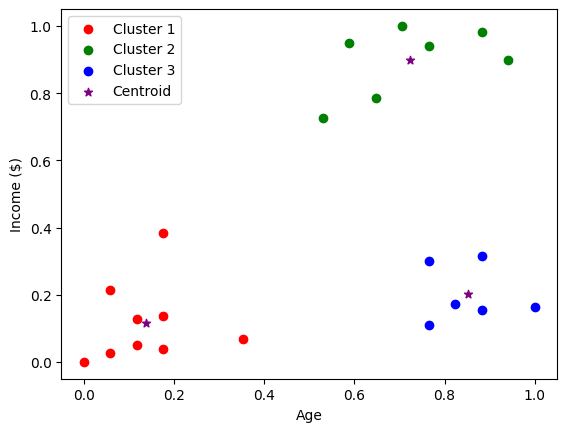

In [90]:
df1 = data[data.cluster == 0]
df2 = data[data.cluster == 1]
df3 = data[data.cluster == 2]

plt.scatter(df1.Age, df1['Income($)'], color = 'red', label = "Cluster 1")
plt.scatter(df2.Age, df2['Income($)'], color = 'green', label = "Cluster 2")
plt.scatter(df3.Age, df3['Income($)'], color = 'blue',  label = "Cluster 3")

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='Centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [92]:
# How to choose K?
# Elbow plot

sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters= k)
    km.fit(data[['Age', 'Income($)']])
    sse.append(km.inertia_)

C:\Users\maghs\.conda\envs\transformersJupyter\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\maghs\.conda\envs\transformersJupyter\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\maghs\.conda\envs\transformersJupyter\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\maghs\.conda\envs\transformersJupyter\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when

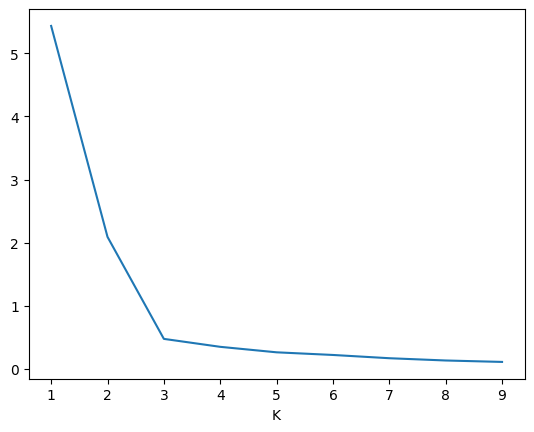

In [93]:
plt.xlabel('K')
plt.plot(k_rng, sse)

### Classification
Classify Iris flowers based on their petal and sepal length.

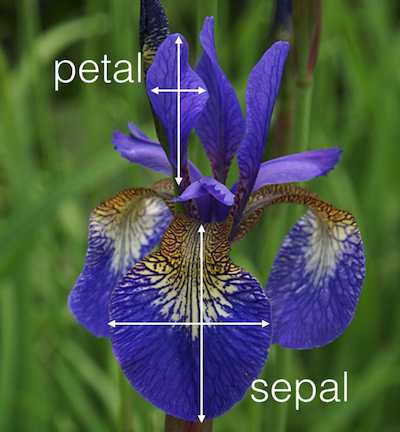

In [94]:
from sklearn.datasets import load_iris

In [95]:
iris = load_iris()

In [96]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [97]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [98]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### Support Vector Machine (SVM)
Can classify binary data by maximizing the decision margin. So, the problem is converted to a binary classification to make it suitable for SVM.

In [99]:
X_svm = iris.data[iris.target != 2]


In [100]:
y_svm = iris.target[iris.target != 2]

In [101]:
y_svm

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_svm, y_svm, test_size= 0.2)

In [103]:
print(X_train.shape)
print(X_test.shape)

(80, 4)
(20, 4)


In [104]:
from sklearn.svm import SVC
svm = SVC(kernel= 'linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [105]:
svm.score(X_test, y_test)

1.0

In [106]:
from sklearn.metrics import classification_report
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



#### Decision Tree

Using petal features of Iris dataset, but have 3 classes.

In [107]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.2)

In [108]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [109]:
#evaluate the model
y_pred = dt.predict(X_test)

In [110]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.92      0.92      0.92        12
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30



[Text(0.5, 0.9166666666666666, 'petal length (cm) <= 2.45\ngini = 0.666\nsamples = 120\nvalue = [41, 38, 41]\nclass = setosa'),
 Text(0.4, 0.75, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]\nclass = setosa'),
 Text(0.6, 0.75, 'petal width (cm) <= 1.75\ngini = 0.499\nsamples = 79\nvalue = [0, 38, 41]\nclass = virginica'),
 Text(0.4, 0.5833333333333334, 'petal length (cm) <= 5.05\ngini = 0.176\nsamples = 41\nvalue = [0, 37, 4]\nclass = versicolor'),
 Text(0.3, 0.4166666666666667, 'sepal length (cm) <= 4.95\ngini = 0.051\nsamples = 38\nvalue = [0, 37, 1]\nclass = versicolor'),
 Text(0.2, 0.25, 'petal length (cm) <= 3.9\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]\nclass = versicolor'),
 Text(0.1, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = versicolor'),
 Text(0.3, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(0.4, 0.25, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]\nclass = versicolor'),
 Text(0.5, 0.416666666666

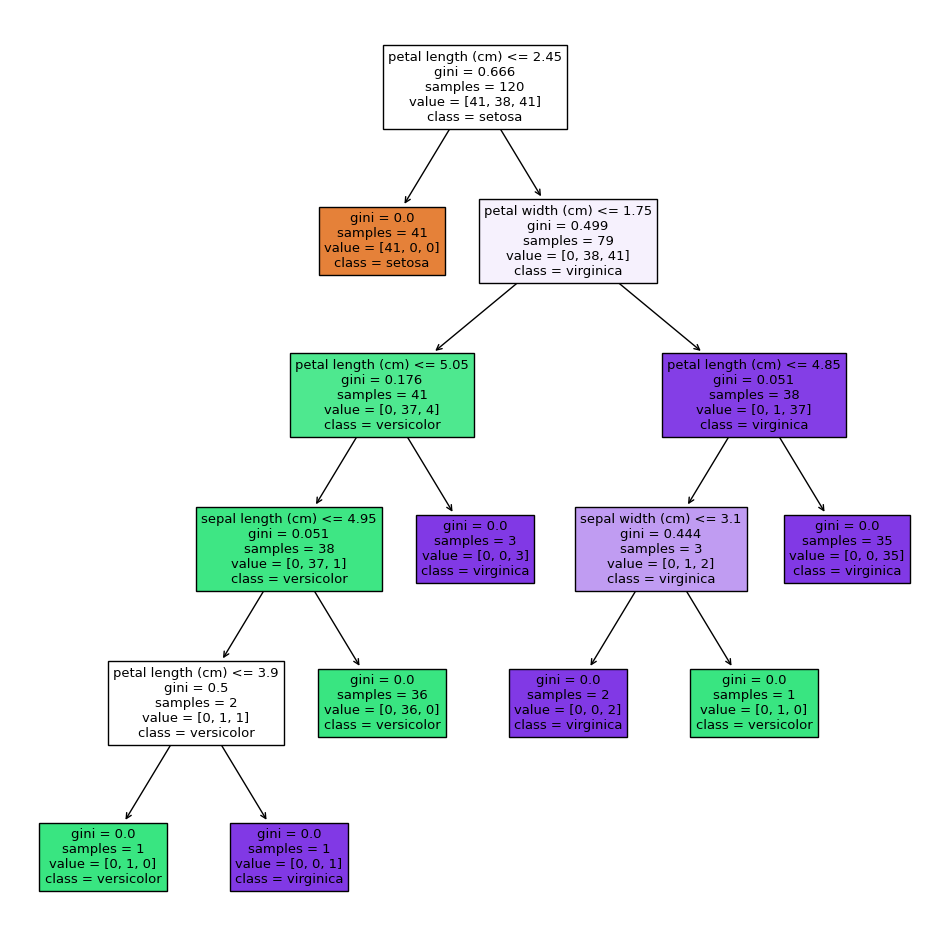

In [111]:
from sklearn.tree import plot_tree
plt.figure(figsize= (12,12))
plot_tree(dt, feature_names= iris.feature_names, class_names= iris.target_names, filled = True)

#### K-Nearest Neighbours (KNN)

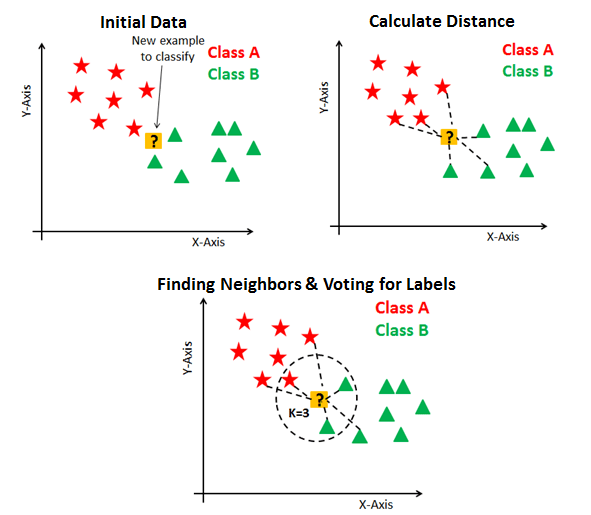

In [112]:
# importing the library
from sklearn.neighbors import KNeighborsClassifier

In [113]:
knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [114]:
# evaluation
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.92      0.96        12
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



#### Artificial Neural Network (ANN)

Also called deep learning or deep neural networks (DNN)

In [116]:
import pandas as pd
data = pd.read_csv("data/wine.data.csv")
data.tail()


,0,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065
172,2,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
173,2,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
174,2,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
175,2,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
176,2,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [117]:
import numpy as np

data = np.array(data)
# seperate the features and label
X = data[:,1:]
y = data[:,0]
print(X.shape)
print(y.shape)

(177, 13)
(177,)


In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)
# Normalize the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# import the libraries
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [227]:
# Define a deep model
model = Sequential()
model.add(layers.Dense(10, activation = 'relu', input_shape = (X_train.shape[1],)))
model.add(layers.Dense(6, activation = 'relu'))
model.add(layers.Dense(1, activation = 'linear'))

model.compile(loss = 'mse', optimizer = 'adam', metrics = ['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                140       
                                                                 
 dense_1 (Dense)             (None, 6)                 66        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 213
Trainable params: 213
Non-trainable params: 0
_________________________________________________________________


In [228]:
model.fit(X_train, y_train, epochs = 100, batch_size = 4)

Epoch 1/100
36/36 [==============================] - 1s 2ms/step - loss: 1.0031 - accuracy: 0.2766
Epoch 2/100
36/36 [==============================] - 0s 2ms/step - loss: 0.7873 - accuracy: 0.3830
Epoch 3/100
36/36 [==============================] - 0s 2ms/step - loss: 0.6554 - accuracy: 0.3830
Epoch 4/100
36/36 [==============================] - 0s 2ms/step - loss: 0.5259 - accuracy: 0.3830
Epoch 5/100
36/36 [==============================] - 0s 2ms/step - loss: 0.4052 - accuracy: 0.4681
Epoch 6/100
36/36 [==============================] - 0s 2ms/step - loss: 0.3196 - accuracy: 0.5106
Epoch 7/100
36/36 [==============================] - 0s 2ms/step - loss: 0.2669 - accuracy: 0.5390
Epoch 8/100
36/36 [==============================] - 0s 2ms/step - loss: 0.2294 - accuracy: 0.5603
Epoch 9/100
36/36 [==============================] - 0s 2ms/step - loss: 0.2015 - accuracy: 0.5674
Epoch 10/100
36/36 [==============================] - 0s 2ms/step - loss: 0.1879 - accuracy: 0.5674
Epoch 11/

In [229]:
#evaluate the model
model.evaluate(X_test, y_test)

# y_pred = model.predict(X_test)


2/2 [==============================] - 0s 6ms/step - loss: 0.0377 - accuracy: 0.8333


[0.03767639398574829, 0.8333333134651184]

In [231]:
from tensorflow.keras.utils import to_categorical

In [232]:
y_train_oh = to_categorical(y_train, num_classes= 3)
y_test_oh = to_categorical(y_test, num_classes= 3)

In [233]:
y_train_oh

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0

In [234]:
# Define a deep model
model = Sequential()
model.add(layers.Dense(10, activation = 'relu', input_shape = (X_train.shape[1],)))
model.add(layers.Dense(6, activation = 'relu'))
model.add(layers.Dense(3, activation = 'sigmoid'))

model.compile(loss = 'mse', optimizer = 'adam', metrics = ['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                140       
                                                                 
 dense_4 (Dense)             (None, 6)                 66        
                                                                 
 dense_5 (Dense)             (None, 3)                 21        
                                                                 
Total params: 227
Trainable params: 227
Non-trainable params: 0
_________________________________________________________________


In [235]:
model.fit(X_train, y_train_oh, epochs = 100, batch_size = 4)

Epoch 1/100
36/36 [==============================] - 1s 2ms/step - loss: 0.2708 - accuracy: 0.2695
Epoch 2/100
36/36 [==============================] - 0s 2ms/step - loss: 0.2490 - accuracy: 0.3191
Epoch 3/100
36/36 [==============================] - 0s 2ms/step - loss: 0.2326 - accuracy: 0.4894
Epoch 4/100
36/36 [==============================] - 0s 2ms/step - loss: 0.2198 - accuracy: 0.5390
Epoch 5/100
36/36 [==============================] - 0s 2ms/step - loss: 0.2074 - accuracy: 0.6099
Epoch 6/100
36/36 [==============================] - 0s 2ms/step - loss: 0.1951 - accuracy: 0.7376
Epoch 7/100
36/36 [==============================] - 0s 2ms/step - loss: 0.1830 - accuracy: 0.8085
Epoch 8/100
36/36 [==============================] - 0s 2ms/step - loss: 0.1712 - accuracy: 0.9291
Epoch 9/100
36/36 [==============================] - 0s 2ms/step - loss: 0.1598 - accuracy: 0.9220
Epoch 10/100
36/36 [==============================] - 0s 2ms/step - loss: 0.1479 - accuracy: 0.9291
Epoch 11/

In [242]:
model.evaluate(X_test, y_test_oh)

2/2 [==============================] - 0s 6ms/step - loss: 0.0018 - accuracy: 1.0000


[0.0017849704017862678, 1.0]

#### Ensemble models


##### Bagging

Subsample several times from the data and train a model with each set. Voting between models select the final label.

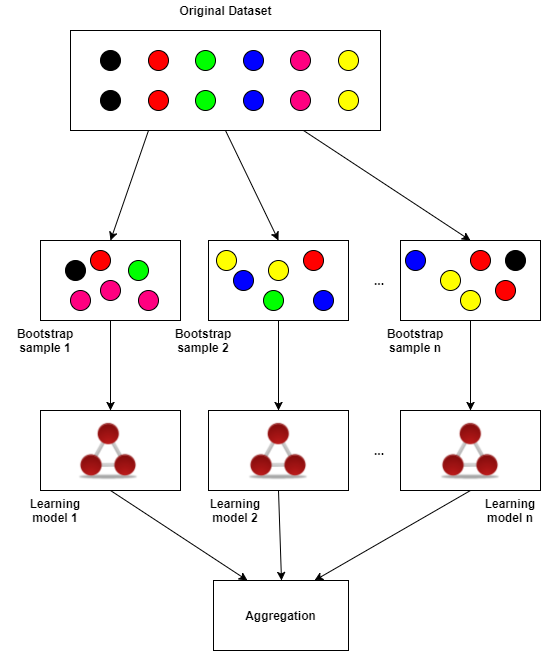

###### Random Forest


In [243]:
# import libraries
import pandas as pd
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [244]:
# load the dataset
iris = load_iris()

In [247]:
# get the labels
y = iris.target
# drop sepal features from the data 
X = iris.data[:, 2:]

In [248]:
# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

In [249]:
# train a random forest
clf_rf = RandomForestClassifier(n_estimators= 50)
clf_rf = clf_rf.fit(X_train, y_train)

In [250]:
# evaluate the model
y_pred = clf_rf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.82      0.90        11
           2       0.85      1.00      0.92        11

    accuracy                           0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



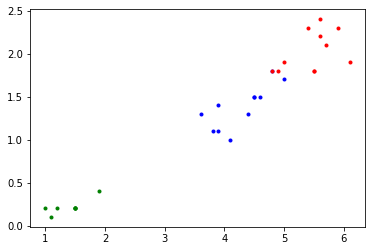

In [251]:
# plot the test data
plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1],color="green",marker='.')
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1],color="blue",marker='.')
plt.scatter(X_test[y_test==2, 0], X_test[y_test==2, 1],color="red",marker='.')

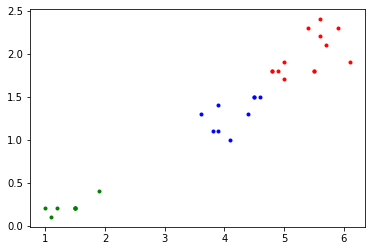

In [252]:
# plot the prediction over test data
plt.scatter(X_test[y_pred==0, 0], X_test[y_pred==0, 1],color="green",marker='.')
plt.scatter(X_test[y_pred==1, 0], X_test[y_pred==1, 1],color="blue",marker='.')
plt.scatter(X_test[y_pred==2, 0], X_test[y_pred==2, 1],color="red",marker='.')

##### Boosting
Training several classifiers in serries. Each time, misclassified samples get greater weights and the others get smaller weights. So, the later classifiers focuse on misclassifies samples.

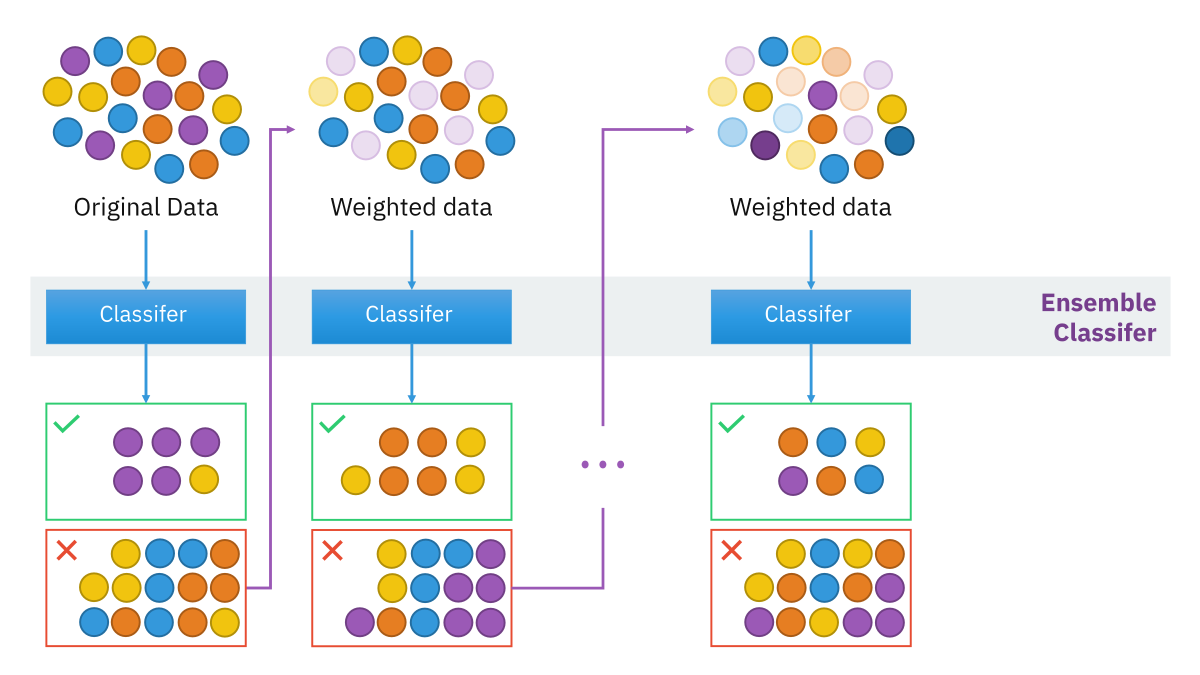

###### Gradient Boosting

In [253]:
from sklearn.ensemble import GradientBoostingClassifier

In [254]:
# train a random forest
clf_gb = GradientBoostingClassifier(n_estimators= 50)
clf_gb = clf_gb.fit(X_train, y_train)

In [255]:
# evaluate the model
y_pred = clf_gb.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.82      0.90        11
           2       0.85      1.00      0.92        11

    accuracy                           0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



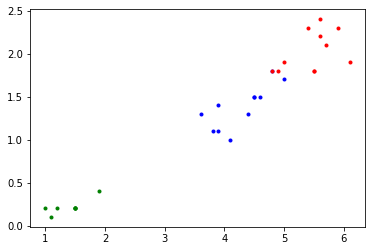

In [256]:
# plot the test data
plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1],color="green",marker='.')
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1],color="blue",marker='.')
plt.scatter(X_test[y_test==2, 0], X_test[y_test==2, 1],color="red",marker='.')

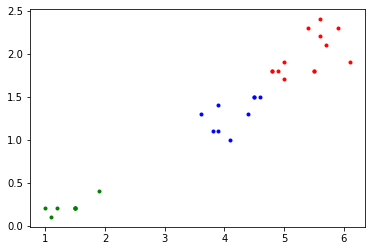

In [257]:
# plot the prediction over test data
plt.scatter(X_test[y_pred==0, 0], X_test[y_pred==0, 1],color="green",marker='.')
plt.scatter(X_test[y_pred==1, 0], X_test[y_pred==1, 1],color="blue",marker='.')
plt.scatter(X_test[y_pred==2, 0], X_test[y_pred==2, 1],color="red",marker='.')